# 1. TimeSeries 
 - 시계열 : Time Series
 - Time : 시간에 따라 (보통 일정 간격으로)
 - Series : 동일 변수를 반복 측정한 것.
 - 예) 가격, 고객 수, 방문자, 매출 등 
 - 교재 : “Introduction to Time Series Analysis and Forecasting” (2nd ed.)
 ![Book](1.png)

## 시계열 분석의 활용 
 - 운영/생산 관리
 - 마케팅
 - 금융/재무
 - 경제
 - 인구

# 시계열 자료의 특징들
![Book](2.png)
 - 랜덤워크는 다음주가 어떻게 될지 모르기 때문에 평균을 활용하는 수 밖에 없다.
 - 시계열 데이터는 랜덤워크라고 가정하고 분석한다. 그리고 거기에 패턴이 있을 것이라고 생각한다. 

![Book](3.png)
 - Correlation -> 서로 연관이 있는 관계
 - 랜덤워크는 오르고 내리고 규칙이 없다.
 - 자기상관은 한번 오르면 내려가는데 조금 오래걸리고, 내리면 오르기 조금 시간이 걸린다 
  - 앞에 일어난 사건이 뒤에 일어난 사건에 영향을 준다. 

![Book](4.png)
 - Linear Trend : 전체적으로 영향을 주는 형태다. 자기상관(바로 앞사건이 뒷사건에)와 다른 부분. 
  - 선형적으로 영향을 주고 트랜드가 주가 되지만, 미세하게 랜덤워크하는 형태 

![Book](5.png)
 - Linear + Random Walk
 - 위 그래프의 경우 여름에 많이 팔리고 겨울에 적게 팔린 것.
 - 통계에서는 주기성이 있다면 계절성이라 표현한다. 꼭 계절에 따라 형성되지 않더라도.
 - 자기 상관이랑 관계가 있다. 한 주기로 영향을 준다고 생가하면 됨.
 - 예) 지난 겨울에 적게 팔렸으면, 이번 겨울에도 적게 팔릴 것이다. 
  - 주기에 맞는 시기에 영향

![Book](6.png)
 - 트랜드가 중간에 한번 바뀌었다. 이 경우 분석이 힘들다.
 - 시계열은 하나의 패턴이 있다고 가정하는데 중간에 바뀌면 분석과 예측이 힘들다. 

![Book](7.png)
 - Stationary(정상) : 패턴이 멈춰있다. 즉, 패턴이 변하지 않는다.
 - Non-Stationary(비정상) : 패턴이 멈춰있지 않다. 계속 패턴이 변한다. 

![Book](8.png)
 - Linear Trend + Seasonal Trend + Nonstationary (비정상)

![PPT](9.png)
![PPT](10.png)
 - 패턴이 바뀌는 것은 아니지만 일시적으로 바뀌는 경우가 있다. 

In [1]:
closale <- read.csv("closale.csv")
closale2 <- closale
head(closale)

,date,sales
1,1992-01,4889
2,1992-02,5197
3,1992-03,6061
4,1992-04,6720
5,1992-05,6811
6,1992-06,6579


In [2]:
library(zoo)
library(lubridate)

Warning message:
: package 'zoo' was built under R version 3.3.2
Attaching package: 'zoo'

The following objects are masked from 'package:base':

    as.Date, as.Date.numeric


Attaching package: 'lubridate'

The following object is masked from 'package:base':

    date



In [3]:
as.yearmon("2007-03-01")

[1] "3 2007"

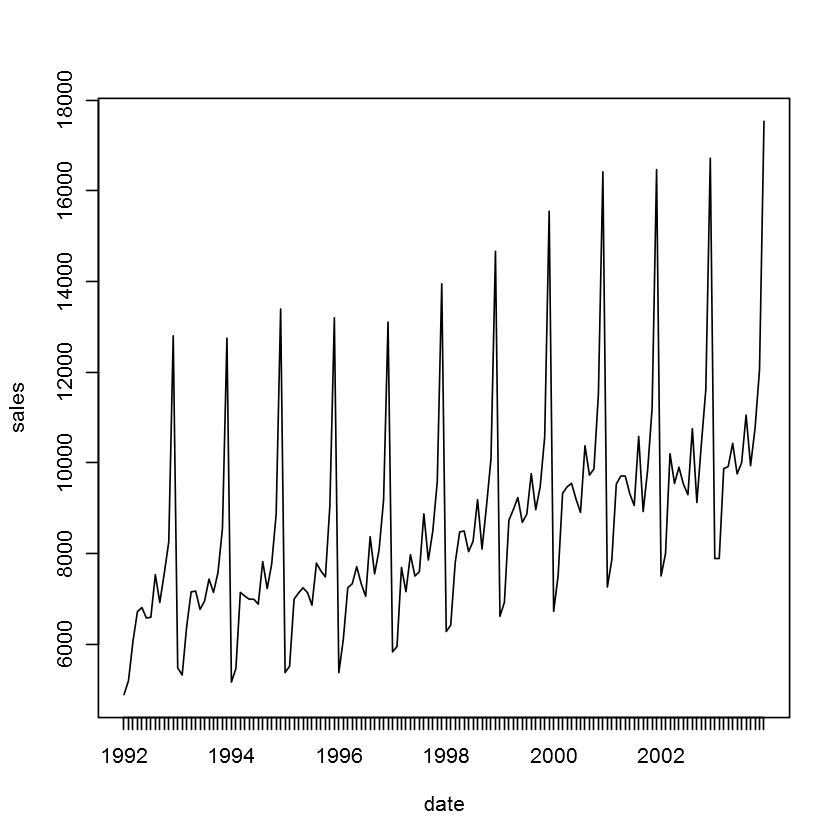

In [4]:
closale$date <- as.yearmon(closale$date)
plot(closale,type="l")

# Smoothing (평활)
 - 데이터에서 단기적인 변화를 제거하고 매끄럽게 만드는 것.
 - 전반적인 추세를 보고 싶을 때 사용한다.
 - 잘 사용하지는 않는 기술.(잘 모르는 사람이 사용한다고 한다.)

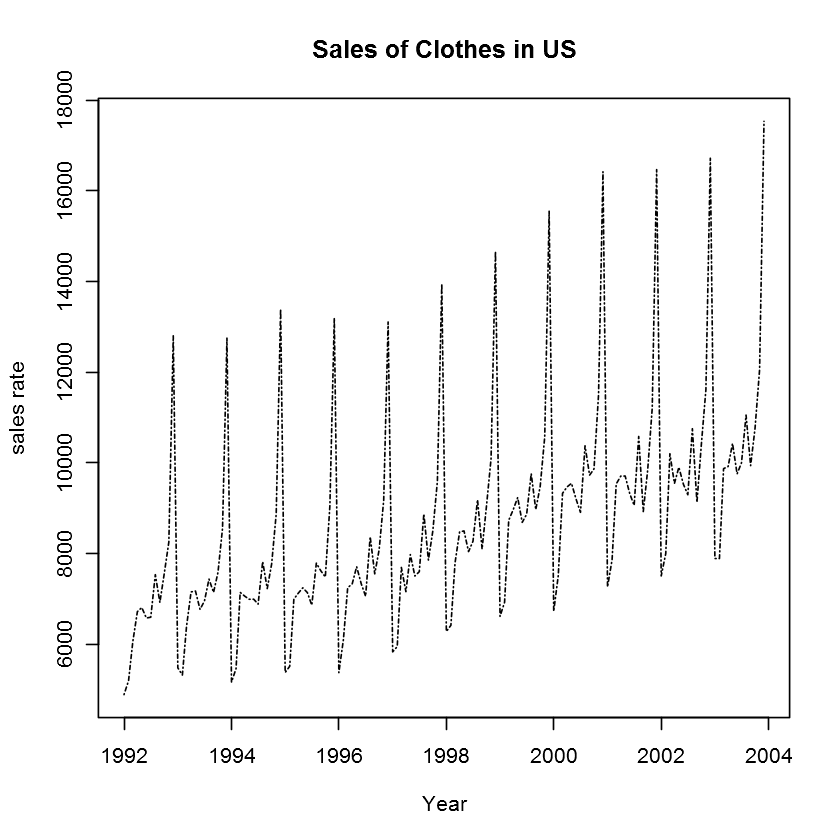

In [5]:
### lubridate 를 사용하려면 뒤에 01 를 붙여서 사용하면 된다. 
closale2$date <- paste0(closale2$date,"-01")
closale2$date <- ymd(closale2$date)
plot(closale2, type='l', lty=4, main="Sales of Clothes in US", xlab="Year", ylab="
sales rate")

## 이동평균
 - Moving average
 - 가장 흔히 쓰이는 평활법
 - 일정 기간 간격(예: +-개월) 으로 평균 
  - 예) 자기 날짜를 기준으로 앞으로 2달 뒤로 2달 총 5개를 평균. 
 - 기간을 늘리게 된다면 더 부드럽게 된다. 

### 5개월 이동 평균

In [6]:
mov.avr = rollmean(closale$sales, 5, na.pad=T)
# 앞에 2달의 경우 앞에 달 값이 없으므로 na.pad = T를 해줘서 채워줘야된다. 

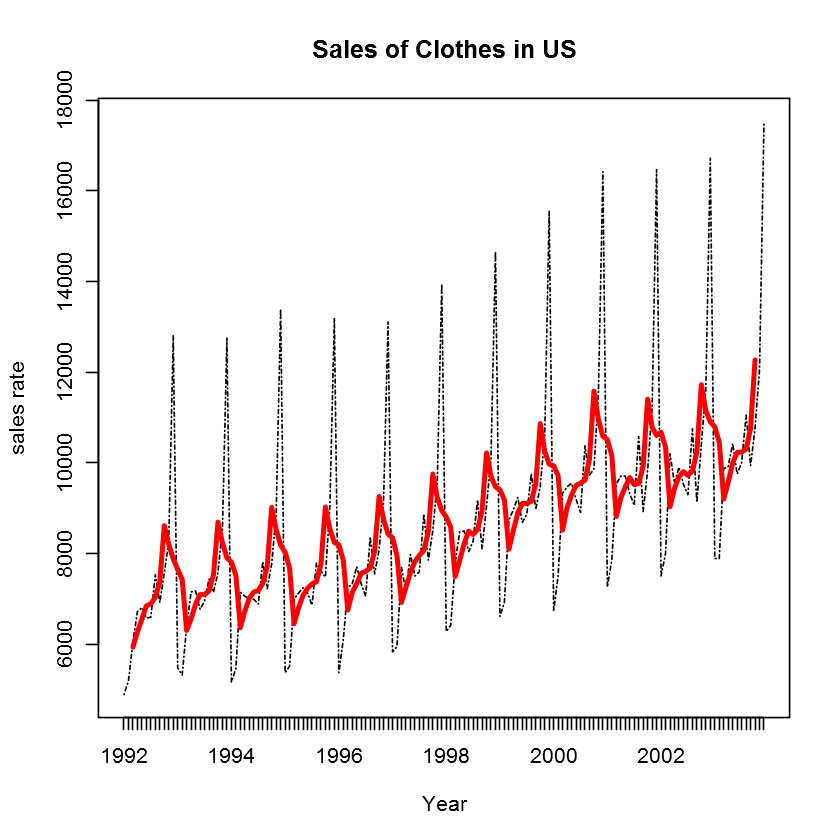

In [7]:
plot(closale, type='l', lty=4, main="Sales of Clothes in US", xlab="Year", ylab="
sales rate")
lines(closale$date, mov.avr, col='red', lwd=3) # x 축 : date, y 축 : mov.avr 

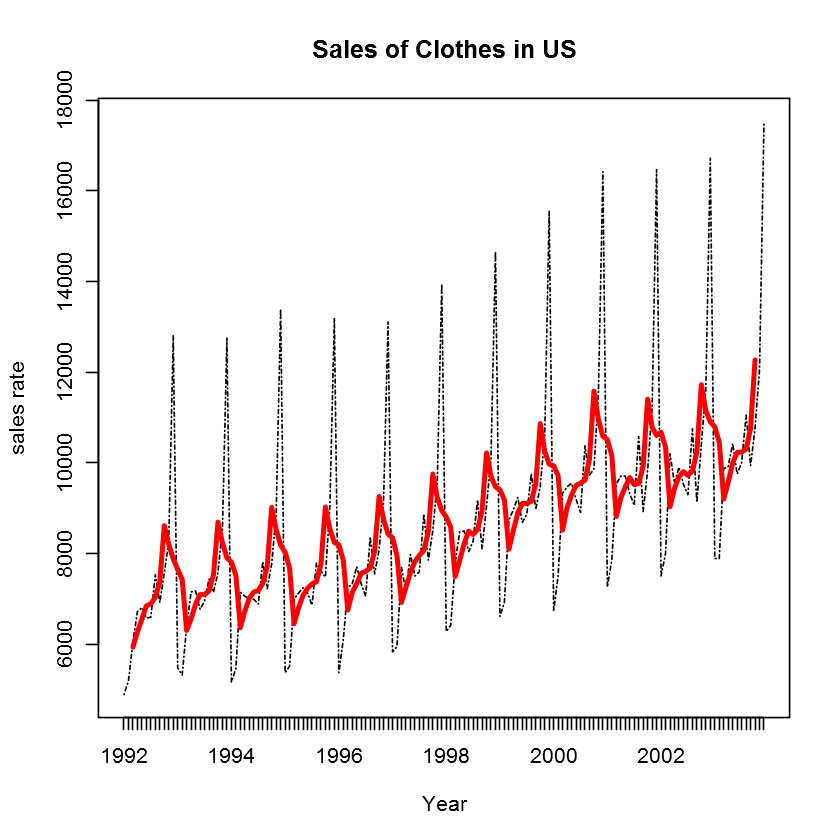

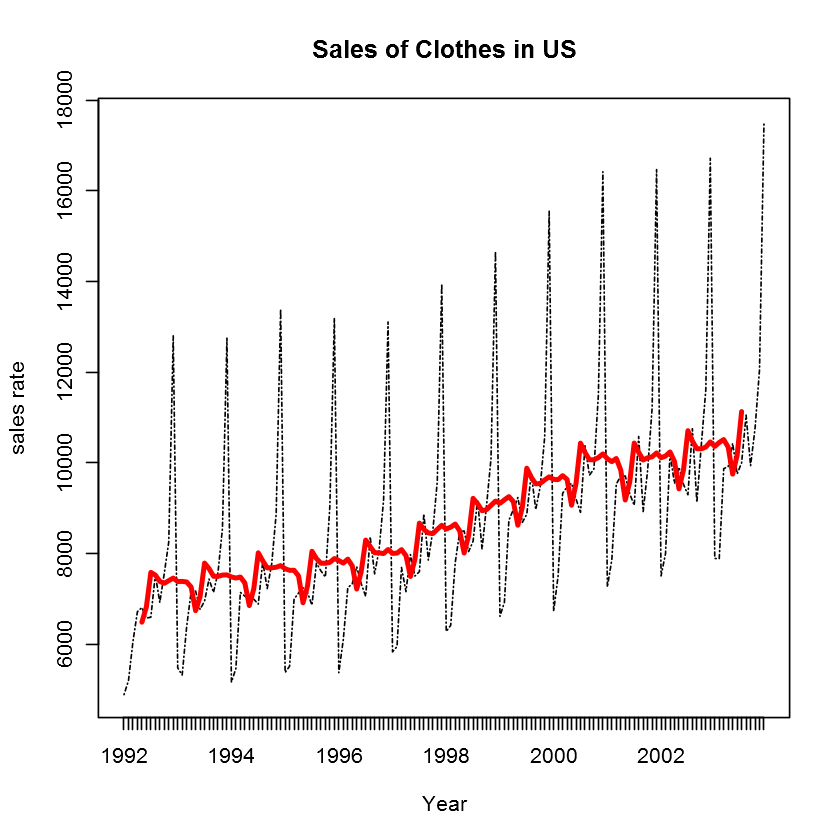

In [8]:
plot(closale, type='l', lty=4, main="Sales of Clothes in US", xlab="Year", ylab="
sales rate")
lines(closale$date, mov.avr, col='red', lwd=3) # x 축 : date, y 축 : mov.avr 

plot(closale, type='l', lty=4, main="Sales of Clothes in US", xlab="Year", ylab="
sales rate")
lines(closale$date, rollmean(closale$sales, 10, na.pad=T), col='red', lwd=3) # x 축 : date, y 축 : mov.avr 

## 이동 중간값
 - Moving median
 - 이동 평균과 동일하나 평균 대신 중간 값 사용.

### 5개월 이동 중간값

In [9]:
mov.med = rollmedian(closale$sales, 5, na.pad=T)

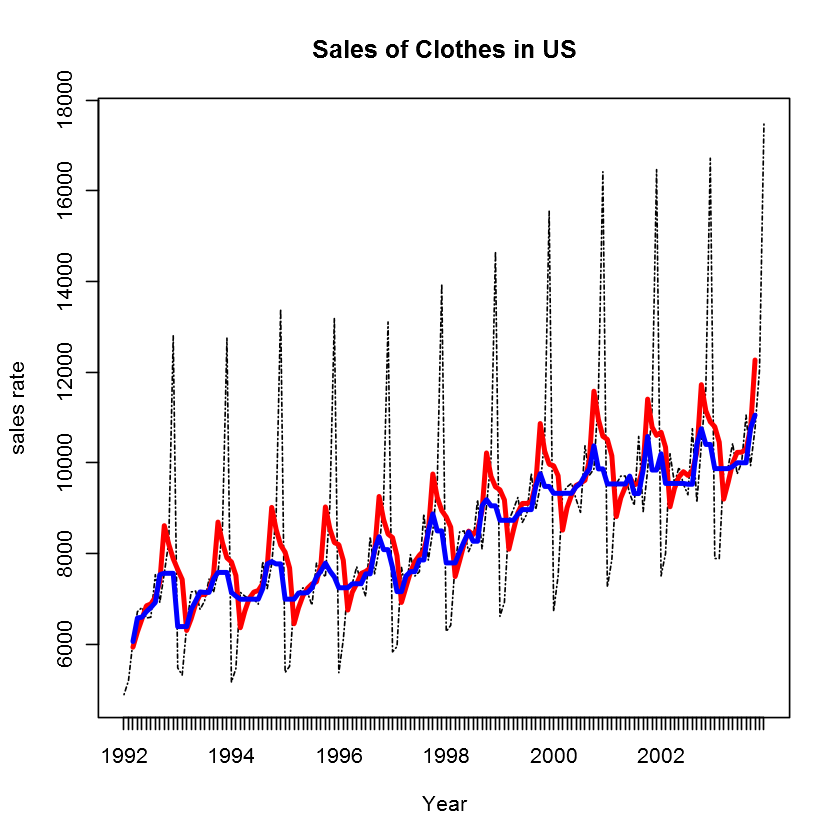

In [10]:
plot(closale, type='l', lty=4, main="Sales of Clothes in US", xlab="Year", ylab="
sales rate")
lines(closale$date, mov.avr, col='red', lwd=3) # x 축 : date, y 축 : mov.avr 
lines(closale$date, mov.med, col='blue', lwd=3)

## 국소회귀 
 - locally-weighted polynomial regression
 - 시계열에서 일부를 회귀, 회귀선을 이어붙여 평활 
 - 일정구간에서만 회귀분석을 한다. 선들을 쭉이어서 한다.  => 가중 회귀 
 - 국소 가중 회귀 => 가쪽에 있는 데이터의 경우가 Weight를 적게 주고 가운데 있는 데이터를 Weight를 많이 준다. 

In [11]:
loc.reg = lowess(closale$sales) # R의 기본. 

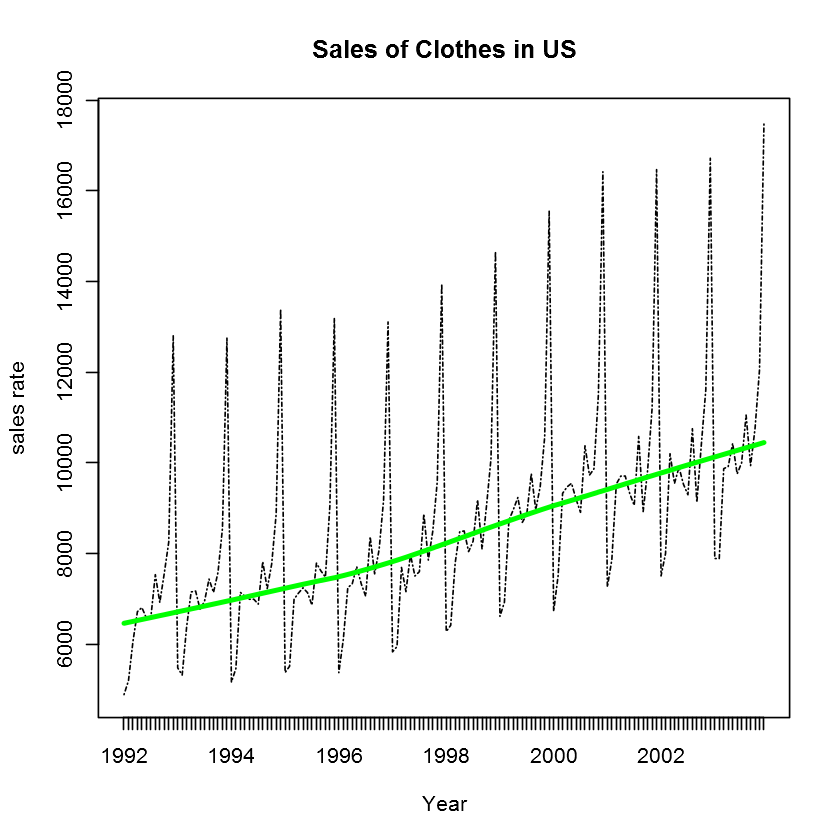

In [12]:
plot(closale, type='l', lty=4, main="Sales of Clothes in US", xlab="Year", ylab="
sales rate")
lines(closale$date, loc.reg$y, col='green', lwd=3) # y가 실제로 필요한 값.

## 자기 상관. ACF
 - AutoCorrelation Function 
 - 1 간격, 2 간격, 3 간격으로 상관계수를 구하는 것.

![PPT](11.png)
 - 첫번째는 첫달과 첫 달 차이, 두번째는 첫달과 두번째 달 차이
  - 이걸 쭉 하게 된다면 영향도가 적어진다. Cor값이 줄어든다 
  - 어떠한 사건이 발생해도 평균으로 돌아온다. 
 - 점선 : p-value

![PPT](12.png)
 - 영향도가 없다. 그래서 랜덤워크이다. 

![PPT](13.png)
 - 쭉 영향도가 있다. 

 - 12월이 Seasonality 가 있다. 
 - Linear Trend가 있어서 Cor 가 약간씩 높다. 

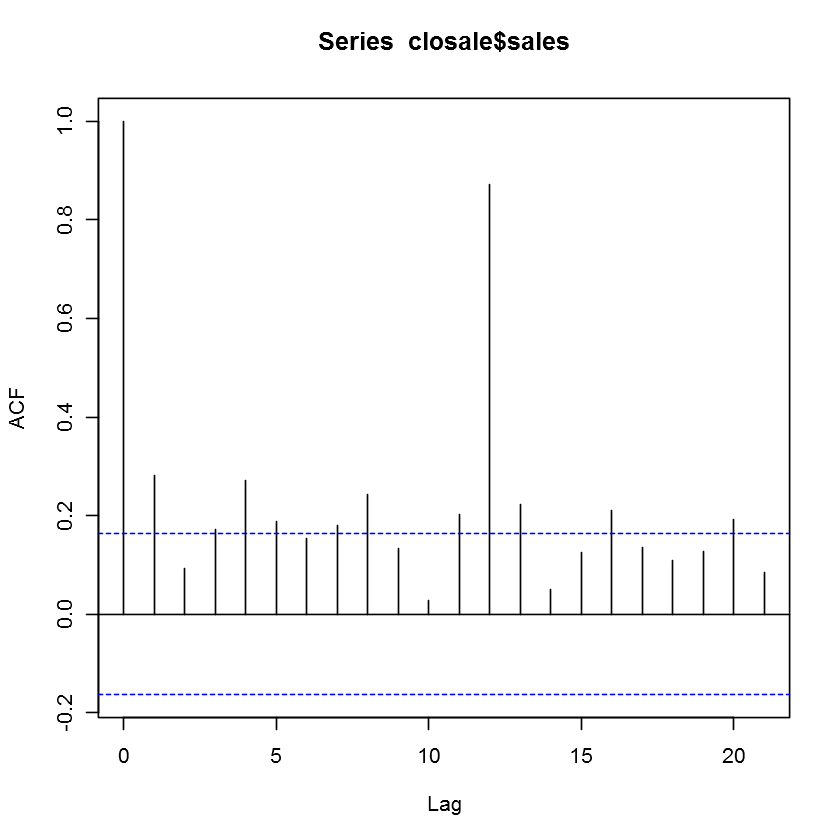

In [13]:
acf(closale$sales) 